In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import os

In [ ]:
usacpal_df = pd.read_csv("USACPALTT01CTGYM.csv", index_col=0, na_values=['(NA)']).fillna(0) #pd.read_csv("USACPALTT01CTGYM.csv")
SNP_df = pd.read_csv("SNPRealTime - Sheet1.csv", index_col=0, na_values=['(NA)']).fillna(0) #pd.read_csv("SNPRealTime - Sheet1.csv")

In [ ]:
pd.to_numeric(SNP_df['Open'].astype(str).str.strip(), downcast='float', errors='coerce')

Date
2023-11-08    4384.370117
2023-11-07    4366.209961
2023-11-06    4364.270020
2023-11-03    4334.229980
2023-11-02    4268.259766
                 ...     
2021-11-12    4655.240234
2021-11-11    4659.390137
2021-11-10    4670.259766
2021-11-09    4707.250000
2021-11-08    4701.479980
Name: Open, Length: 503, dtype: float32

In [ ]:
VGT_df = pd.read_csv("SNPRealTimeVGT - VGT.csv")
VGT_df = VGT_df.convert_dtypes()

In [ ]:
print(usacpal_df.tail(5))
print(SNP_df.tail(5))
print(VGT_df.tail(5))

            USACPALTT01CTGYM
DATE                        
2023-04-01          4.872060
2023-05-01          3.993678
2023-06-01          2.971588
2023-07-01          3.160709
2023-08-01          3.696583
               Open     High      Low   Close*  Adj Close**  Unnamed: 6
Date                                                                   
2021-11-12  4655.24  4688.47  4650.77  4682.85      4682.85         0.0
2021-11-11  4659.39  4664.55  4648.31  4649.27      4649.27         0.0
2021-11-10  4670.26  4684.85  4630.86  4646.71      4646.71         0.0
2021-11-09  4707.25  4708.53  4670.87  4685.25      4685.25         0.0
2021-11-08  4701.48  4714.92  4694.39  4701.70      4701.70         0.0
             Date    Open    High     Low  Close*  Adj Close**     Volume
506  Nov 12, 2021  445.48  450.09  444.88   449.4       442.26    366,500
507  Nov 11, 2021  445.12  445.32  443.56  444.08       437.03    270,800
508  Nov 10, 2021  446.55  448.91  440.17  441.69       434.67  1,600,7

In [ ]:
print(usacpal_df.describe())
print("\n")
print(SNP_df.describe())
print("\n")
print(VGT_df.describe())

       USACPALTT01CTGYM
count        164.000000
mean           2.197674
std            2.174915
min           -0.226851
25%            0.837276
50%            1.714762
75%            2.487476
max            8.968371


              Open         High          Low       Close*  Adj Close**  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean   4199.298072  4228.063777  4168.102744  4199.003698  4199.003698   
std     286.789410   282.562426   289.314374   285.867987   285.867987   
min    3520.370000  3608.340000  3491.580000  3577.030000  3577.030000   
25%    3973.685000  4002.670000  3938.115000  3970.570000  3970.570000   
50%    4157.680000  4186.620000  4129.860000  4160.680000  4160.680000   
75%    4436.070000  4458.390000  4402.480000  4434.660000  4434.660000   
max    4804.510000  4818.620000  4780.040000  4796.560000  4796.560000   

       Unnamed: 6  
count       503.0  
mean          0.0  
std           0.0  
min           0.0  
25%           0

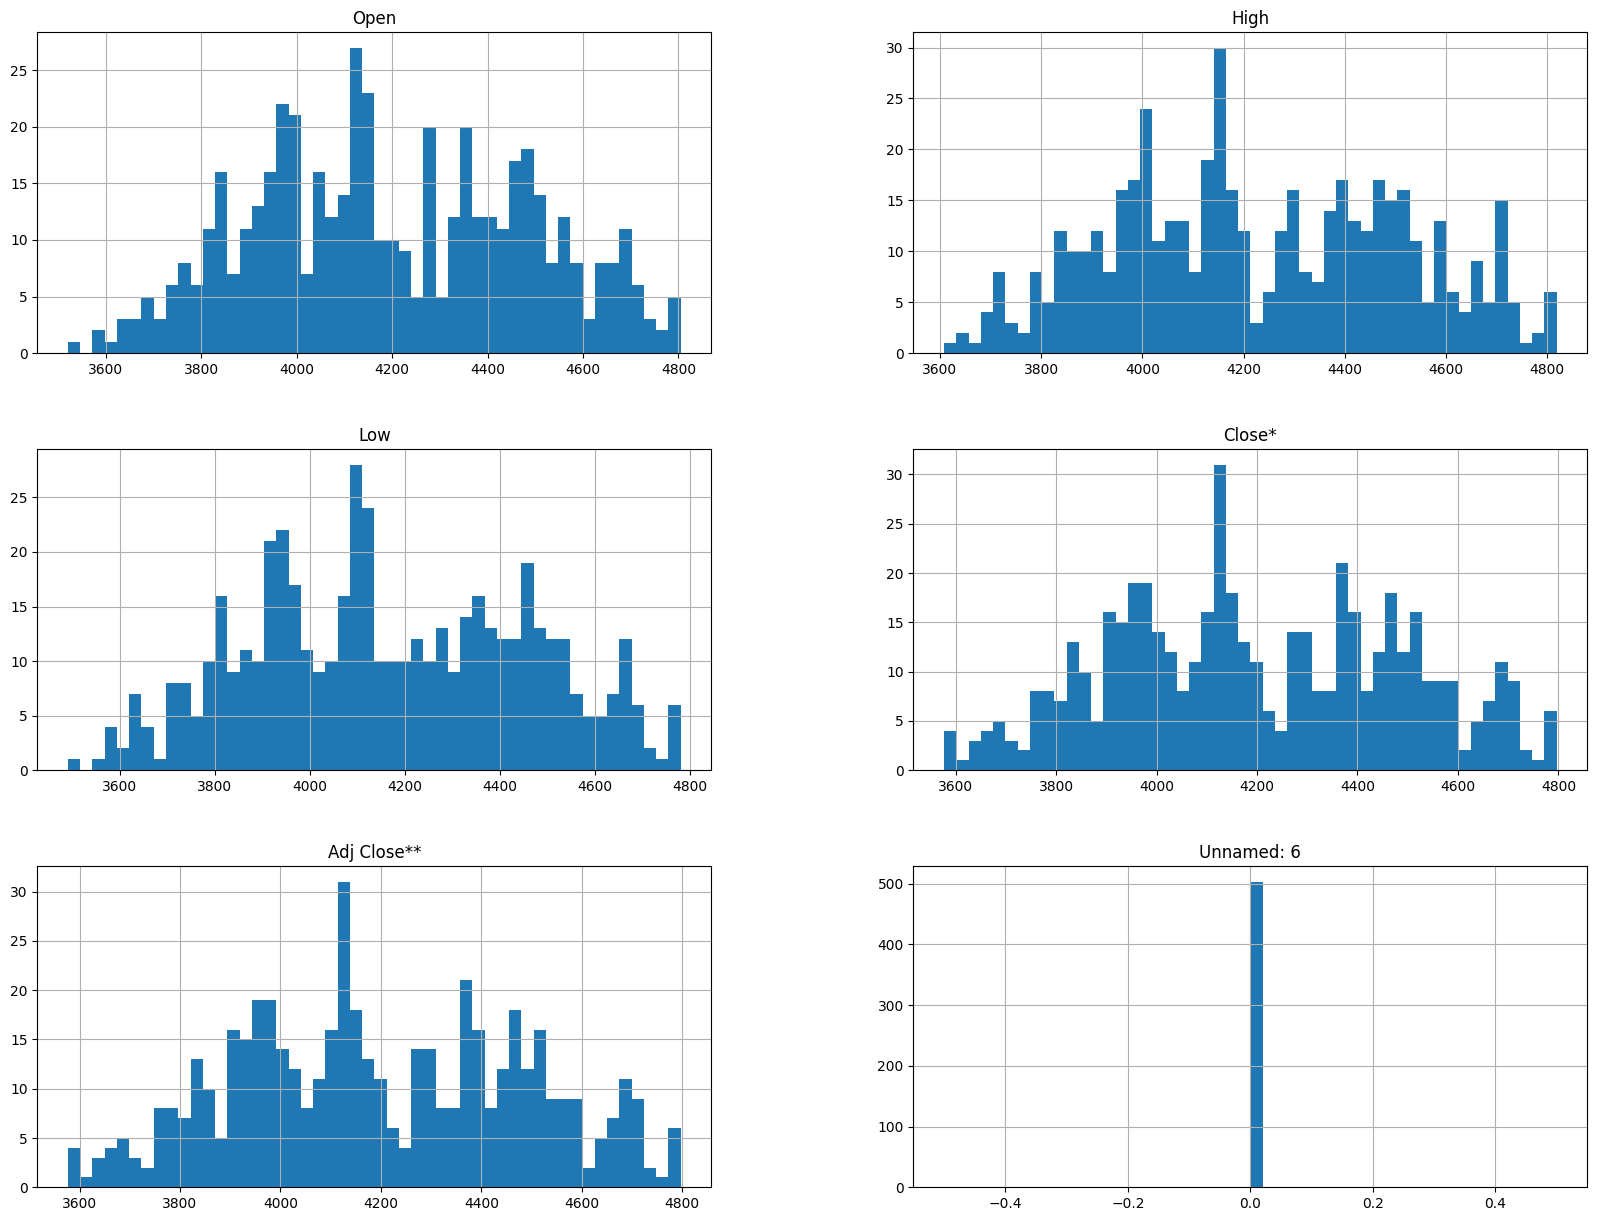

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
SNP_df.hist(bins=50, figsize=(20,15))
plt.show()

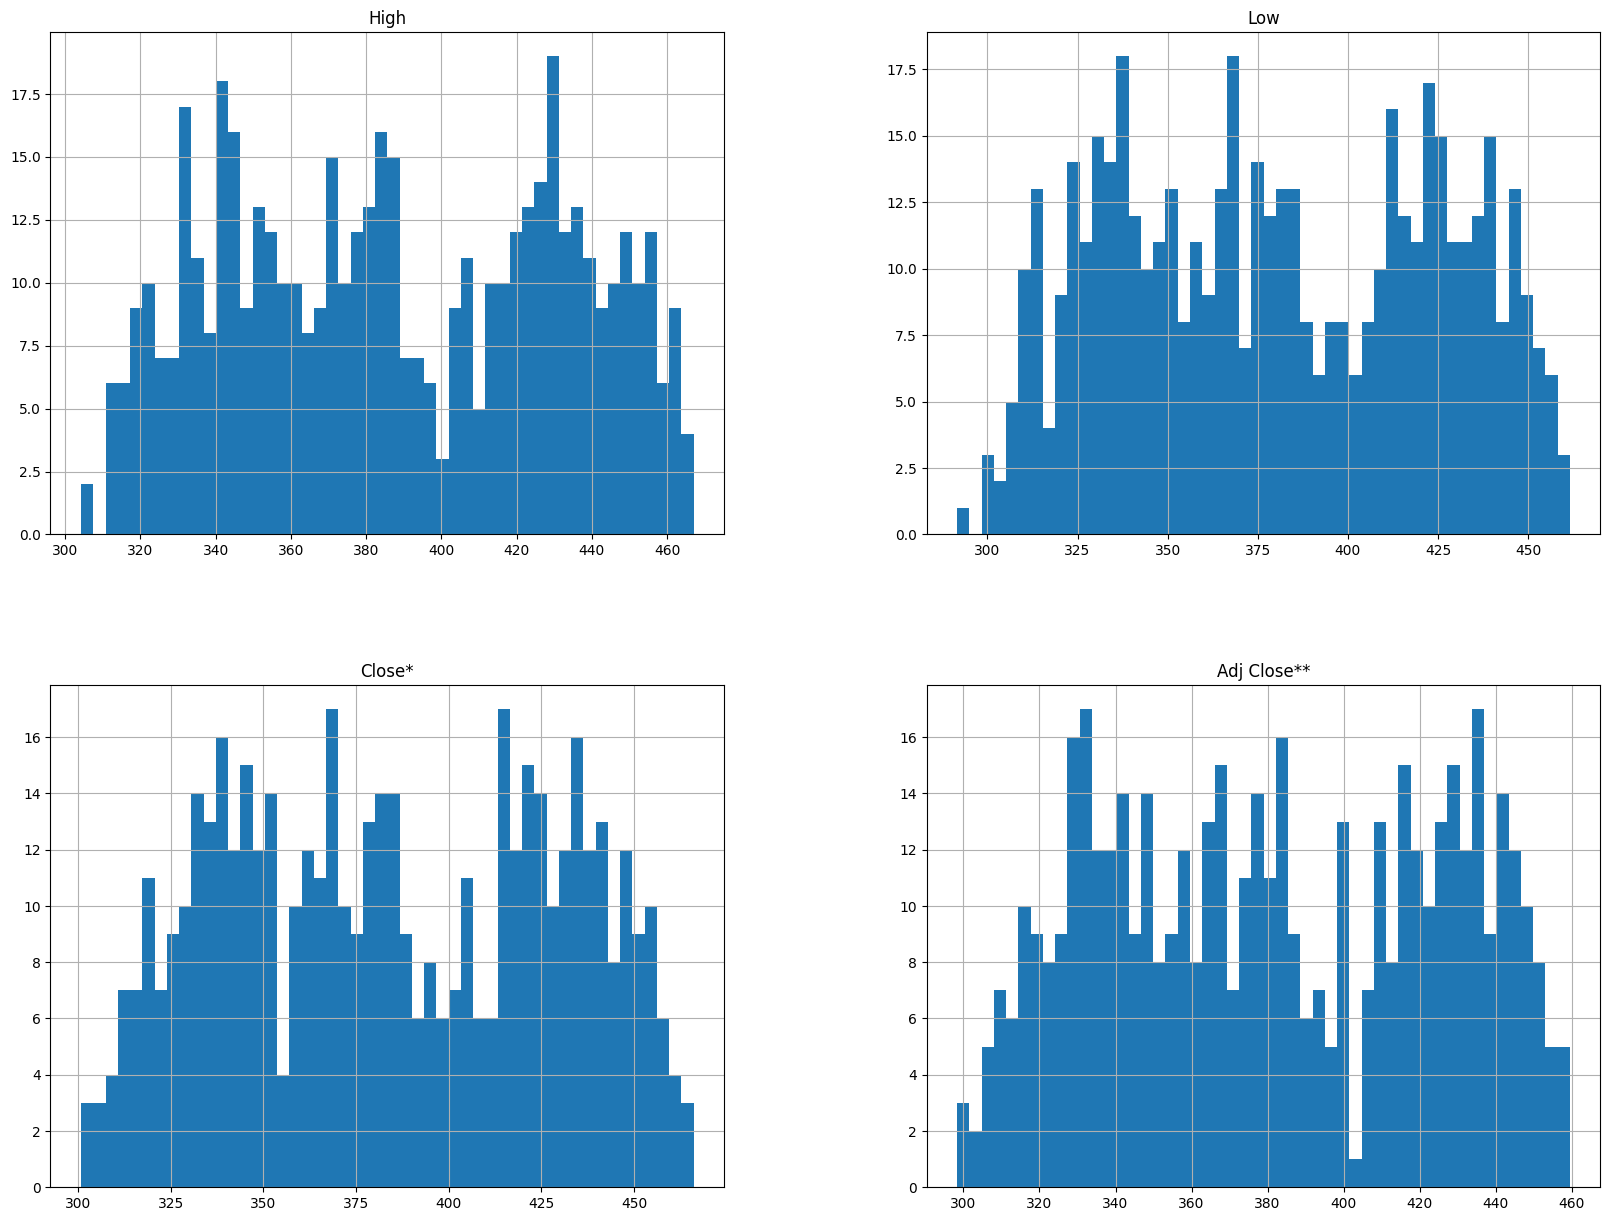

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
VGT_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
corr_matrix = usacpal_df.corr()
corr_matrix.shape

(1, 1)

array([[<Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Close*', ylabel='High'>,
        <Axes: xlabel='Adj Close**', ylabel='High'>],
       [<Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Close*', ylabel='Low'>,
        <Axes: xlabel='Adj Close**', ylabel='Low'>],
       [<Axes: xlabel='High', ylabel='Close*'>,
        <Axes: xlabel='Low', ylabel='Close*'>,
        <Axes: xlabel='Close*', ylabel='Close*'>,
        <Axes: xlabel='Adj Close**', ylabel='Close*'>],
       [<Axes: xlabel='High', ylabel='Adj Close**'>,
        <Axes: xlabel='Low', ylabel='Adj Close**'>,
        <Axes: xlabel='Close*', ylabel='Adj Close**'>,
        <Axes: xlabel='Adj Close**', ylabel='Adj Close**'>]], dtype=object)

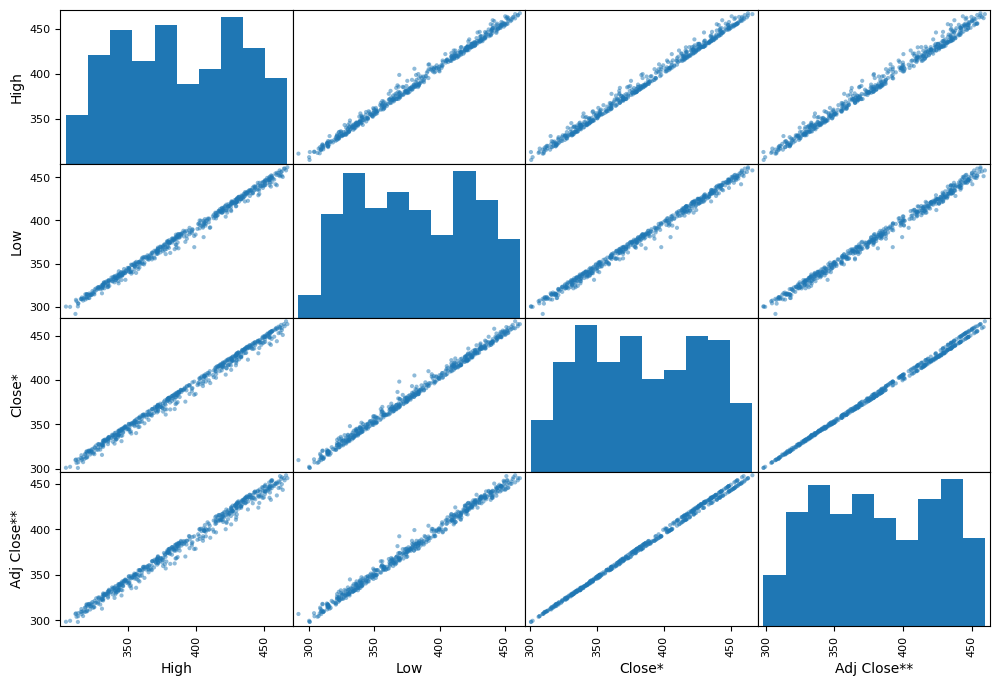

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Open", "High", "Low", "Close*", "Adj Close**"]
scatter_matrix(VGT_df[attributes], figsize=(12, 8))

array([[<Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>,
        <Axes: xlabel='Close*', ylabel='Open'>,
        <Axes: xlabel='Adj Close**', ylabel='Open'>],
       [<Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Close*', ylabel='High'>,
        <Axes: xlabel='Adj Close**', ylabel='High'>],
       [<Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Close*', ylabel='Low'>,
        <Axes: xlabel='Adj Close**', ylabel='Low'>],
       [<Axes: xlabel='Open', ylabel='Close*'>,
        <Axes: xlabel='High', ylabel='Close*'>,
        <Axes: xlabel='Low', ylabel='Close*'>,
        <Axes: xlabel='Close*', ylabel='Close*'>,
        <Axes: xlabel='Adj Close**', ylabel='Close*'>],
       [<Axes: xlabel='Open', ylabel='A

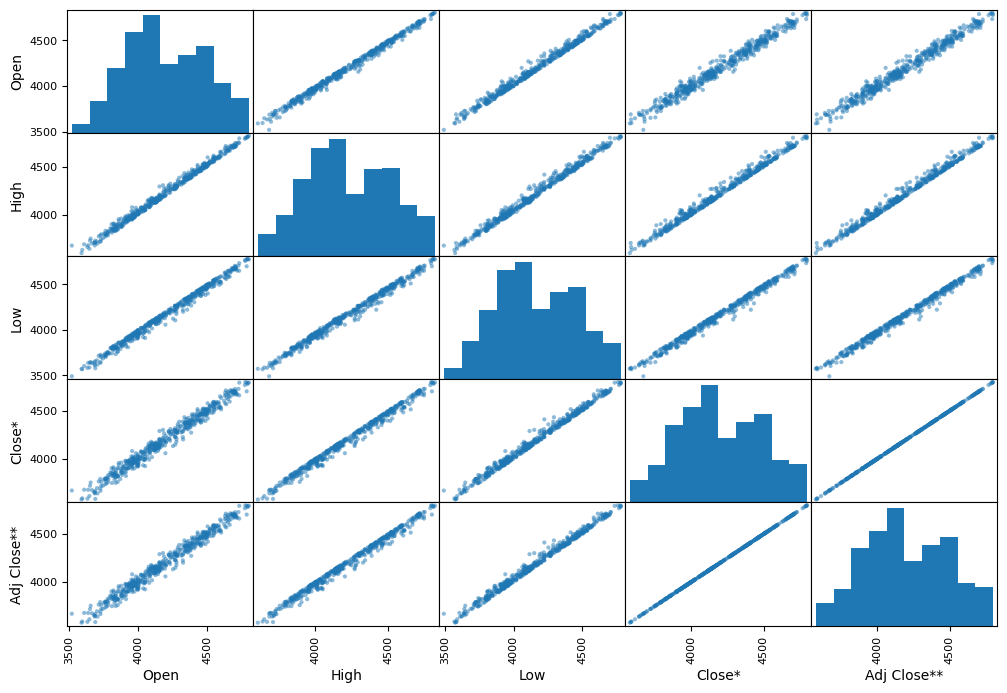

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Open", "High", "Low", "Close*", "Adj Close**"]
scatter_matrix(SNP_df[attributes], figsize=(12, 8))

In [ ]:
df = pd.DataFrame({'SNP': SNP_df['Close*'],
                   'VGT': VGT_df['Close*'],
                   'CPI': usacpal_df['USACPALTT01CTGYM']})
df
#df.concat([SNP_df['Close*'], VGT_df['Close*'], usacpal_df['USACPALTT01CTGYM']])

,SNP,VGT,CPI
0,NaN,435.03,NaN
1,NaN,429.82,NaN
2,NaN,427.88,NaN
3,NaN,421.88,NaN
4,NaN,414.49,NaN
...,...,...,...
2023-11-02,4317.78,<NA>,NaN
2023-11-03,4358.34,<NA>,NaN
2023-11-06,4365.98,<NA>,NaN
2023-11-07,4378.38,<NA>,NaN
